In [ ]:
import numpy as np
import pandas as pd
import scipy as scp
import itertools as it
import seaborn as sns
import matplotlib.pyplot as plt

from sys_resolve_atoms import sys_resolve_atoms

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [96]:
def plot_freq_vs_massa(n, massas, ks, indice_variacao_massa, valor_variacao_massa, titulo):
    frequencias_data = []
    
    for m_val in valor_variacao_massa:
        massas_atuais = list(massas) # Cria uma cópia para não modificar a original
        massas_atuais[indice_variacao_massa] = m_val
        
        system = sys_resolve_atoms(n)
        system.create_matrix(m=massas_atuais, k=ks)
        
        # Obtém as frequências angulares (ω)
        frquencias_angulares = system.get_frequencia_angular()
        
        for i, freq in enumerate(frquencias_angulares):
            frequencias_data.append({
                f'Massa {indice_variacao_massa+1}': m_val,
                'Frequência Angular (ω)': freq,
                'Modo': f'Modo {i+1}'
            })
            
    df_freq = pd.DataFrame(frequencias_data)
    
    plt.figure()
    sns.lineplot(data=df_freq, x=f'Massa {indice_variacao_massa+1}', y='Frequência Angular (ω)', hue='Modo', marker='o')
    plt.title(titulo)
    plt.xlabel(f'Valor da Massa {indice_variacao_massa+1}')
    plt.ylabel('Frequência Angular (ω)')
    plt.legend(title='Modo de Vibração')
    plt.tight_layout()
    plt.savefig(f'frequencias_vs_massa_{n}_atoms.png')

In [97]:
def plot_modos_normais(n, massas, ks, titulo, filename):
    system = sys_resolve_atoms(n)
    system.create_matrix(m=massas, k=ks)
    
    autovetores = system.get_autovetores()
    frquencias_angulares = system.get_frequencia_angular()
    
    plt.figure(figsize=(12, 4 * n))
    
    for i in range(n):
        
        mode = autovetores[:, i]
        try :
            freq = frquencias_angulares[i]
        except IndexError:
            pass
        
        plt.subplot(n, 1, i + 1)
        plt.plot(range(1, n + 1), mode, 'o-')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        plt.title(f'Modo Normal {i+1} (ω = {freq:.2f} rad/s)')
        plt.xlabel('Átomo')
        plt.ylabel('Amplitude Relativa')
        plt.xticks(range(1, n + 1))
        plt.grid(True)
        
    plt.tight_layout()
    plt.savefig(filename)
    # plt.close()

In [3]:
3%3

0

In [ ]:
n = 10.000
m = []
k = 10.000*[1.0]
for i in range(1, 10.001):
    if i%3 == 1:
        m.append(1.0)
    elif i%3 == 2:
        m.append(3.0)
    else:
        m.append(5.0)



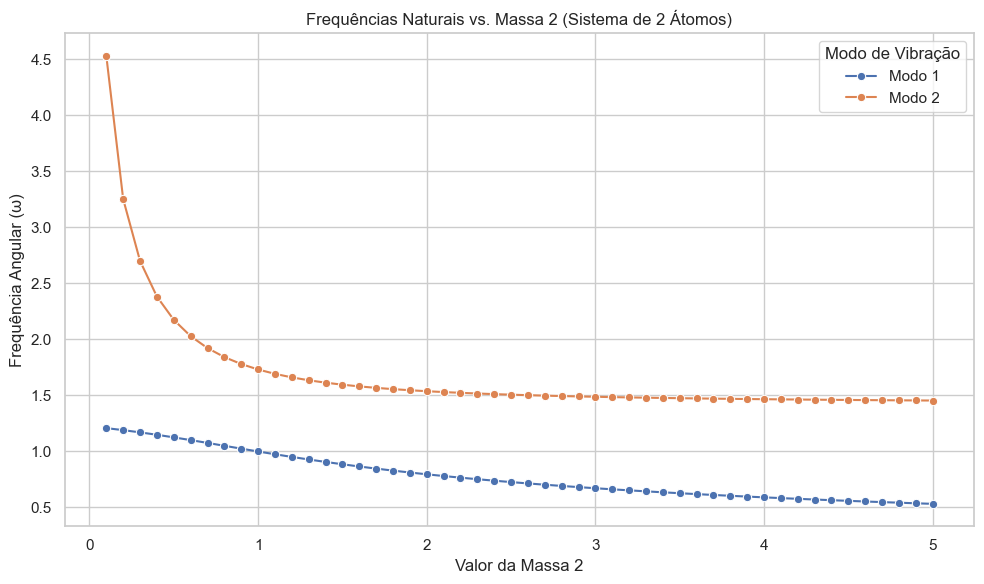

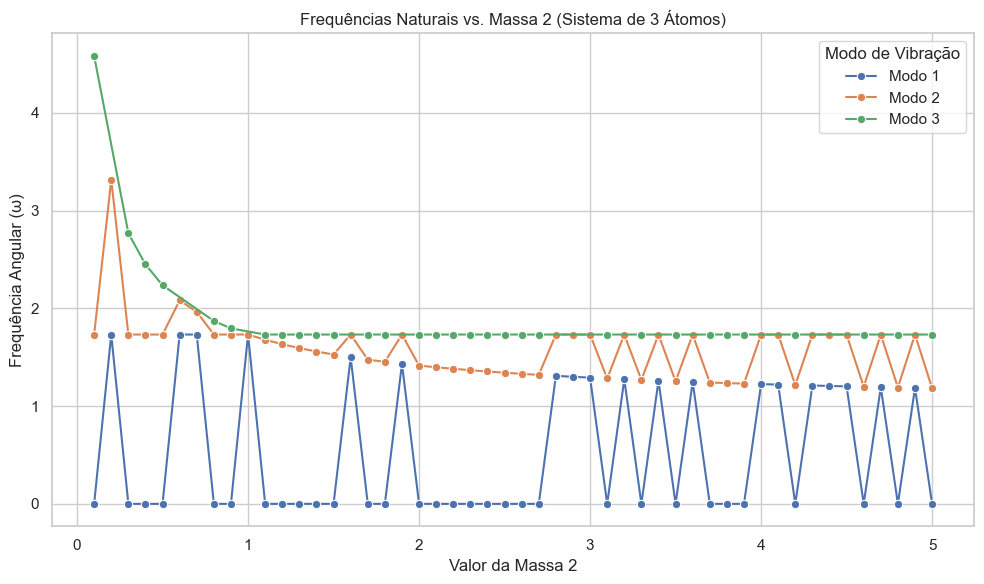

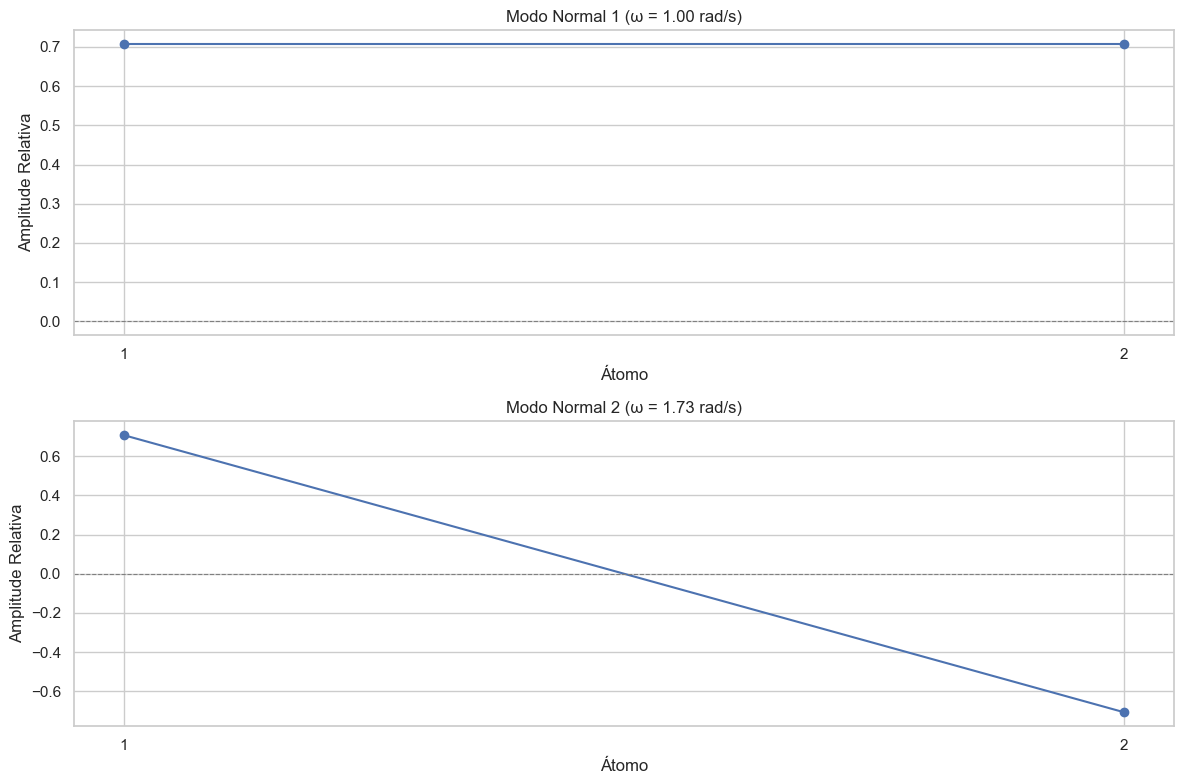

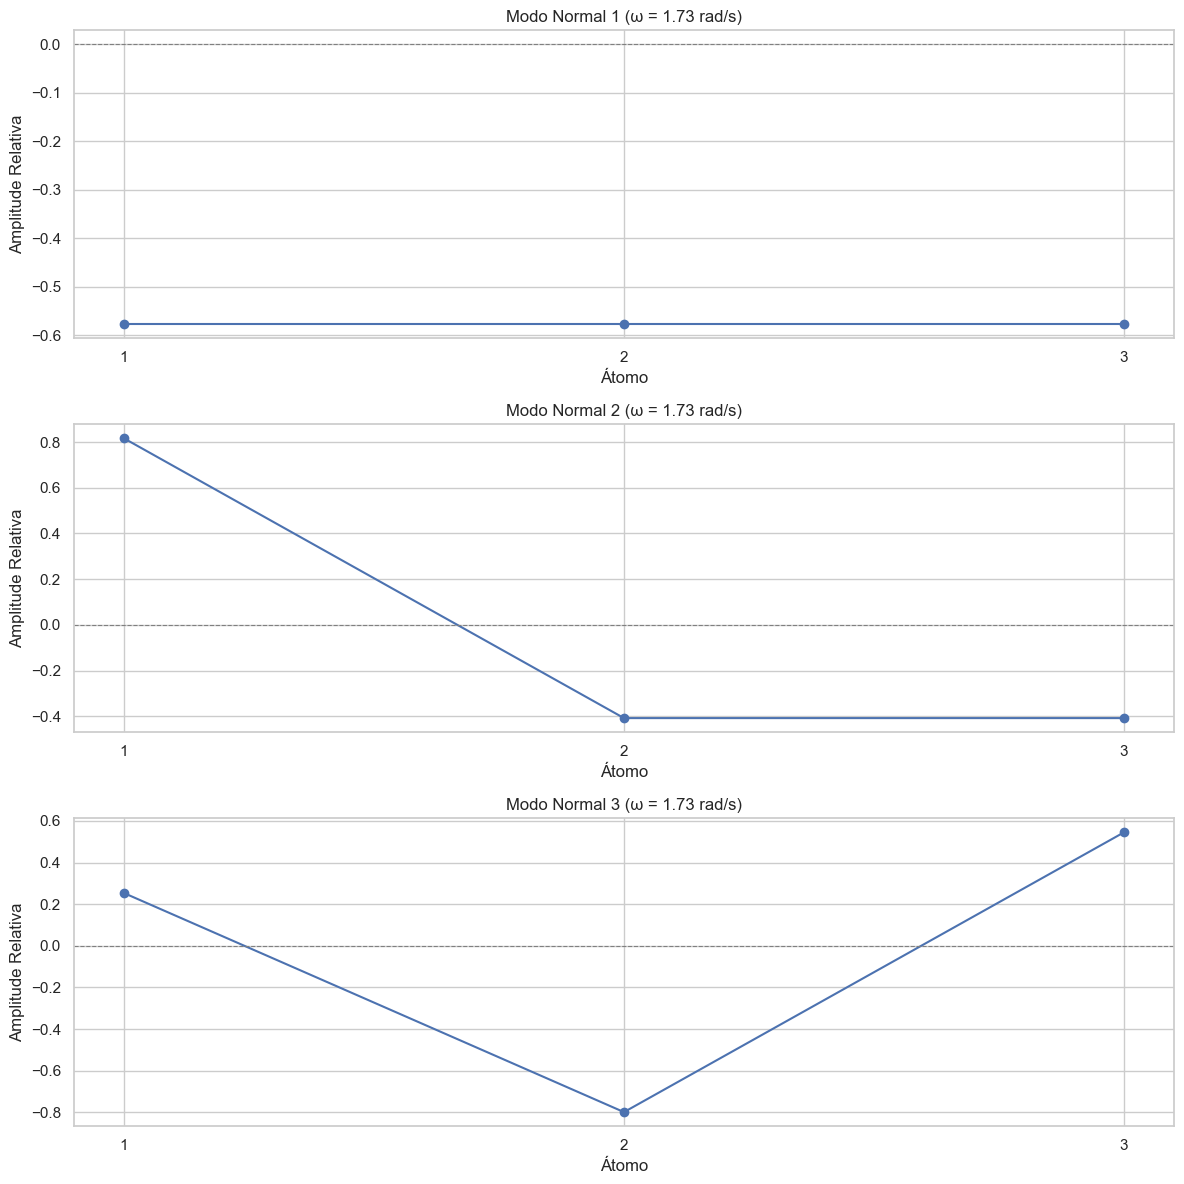

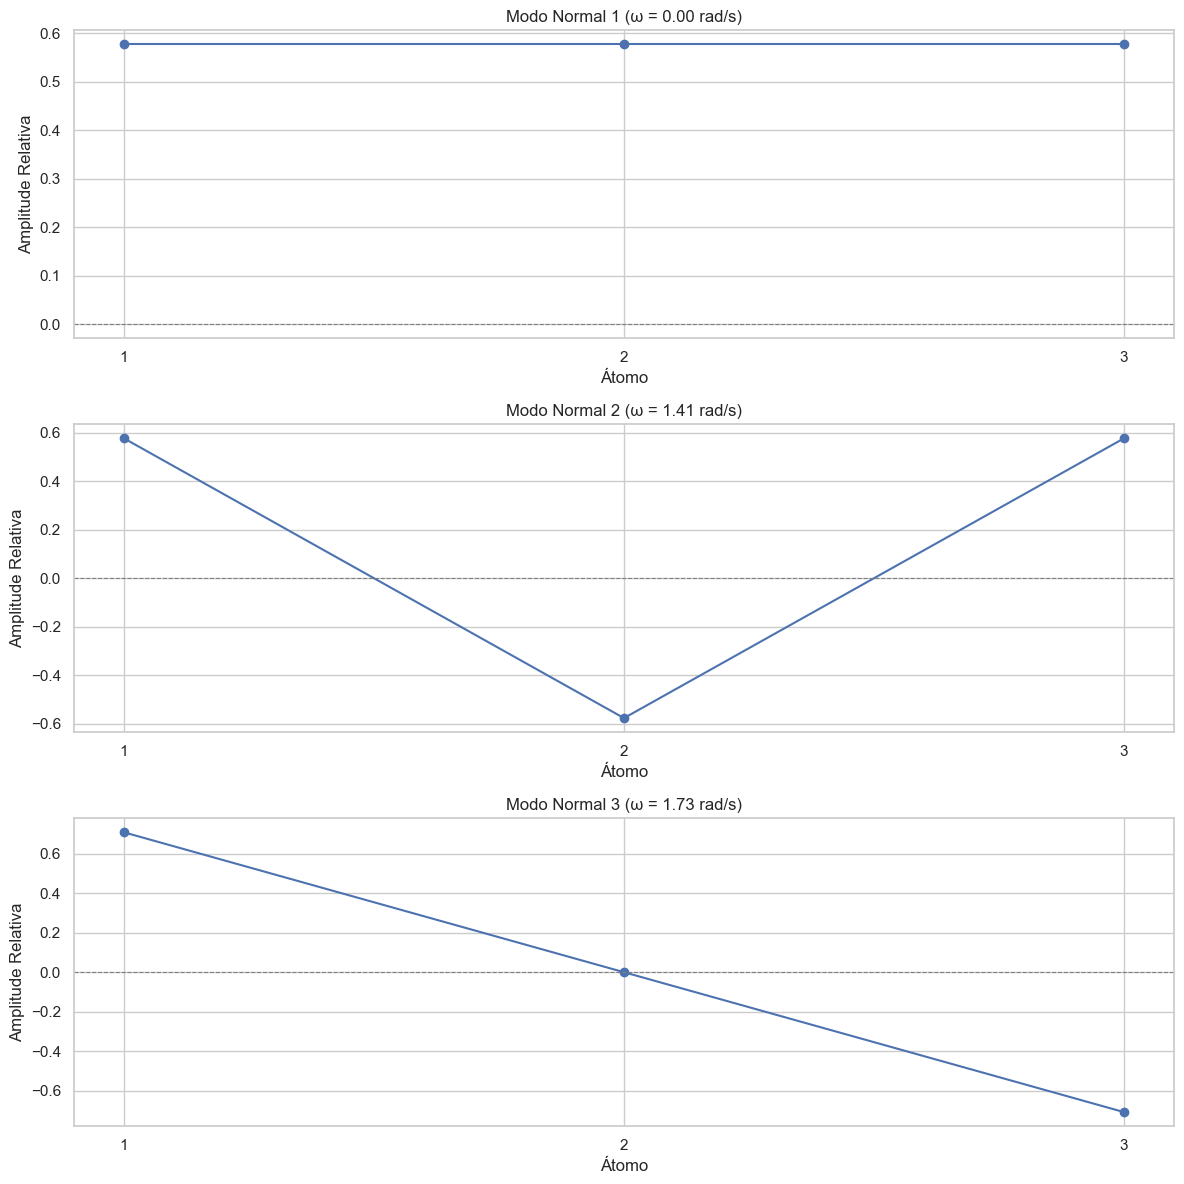

In [98]:
# Variação para 2 átomos (variando m2)
n_2 = 2
massas_2 = [1.0, 1.0] # m1, m2
ks_2 = [1.0, 1.0] # k12
valor_variacao_massa_2 = np.linspace(0.1, 5.0, 50) # Varia m2 de 0.1 a 5.0
plot_freq_vs_massa(n_2, massas_2, ks_2, 1, valor_variacao_massa_2, 
                         'Frequências Naturais vs. Massa 2 (Sistema de 2 Átomos)')

# Variação para 3 átomos (variando m2)
n_3 = 3
massas_3 = [1.0, 1.0, 1.0] # m1, m2, m3
ks_3 = [1.0, 1.0, 1.0] # k12, k23
valor_variacao_massa_3 = np.linspace(0.1, 5.0, 50) # Varia m2 de 0.1 a 5.0
plot_freq_vs_massa(n_3, massas_3, ks_3, 1, valor_variacao_massa_3, 
                         'Frequências Naturais vs. Massa 2 (Sistema de 3 Átomos)')

# --- 2. Gráficos dos modos normais para cada configuração ---



# Modos normais para 2 átomos
plot_modos_normais(2, [1.0, 1.0], [1.0, 1.0], 'Modos Normais (2 Átomos)', 'modos_normais_2_atoms.png')

# Modos normais para 3 átomos (massas iguais)
plot_modos_normais(3, [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], 'Modos Normais (3 Átomos - Massas Iguais)', 'modos_normais_3_atoms_equal.png')

# Modos normais para 3 átomos (uma massa diferente)
plot_modos_normais(3, [1.0, 2.0, 1.0], [1.0, 1.0, 1.0], 'Modos Normais (3 Átomos - Massa Central Maior)', 'modos_normais_3_atoms_middle_heavy.png')

# Coleta de dados para o relatório
report_data = {}

# 2 Átomos
system_2_report = sys_resolve_atoms(2)
system_2_report.create_matrix(m=[1.0, 1.0], k=[1.0, 1.0])
report_data['2_atoms_equal_massa_freq'] = system_2_report.get_frequencia_angular()
report_data['2_atoms_equal_massa_modos'] = system_2_report.get_autovetores()

# 3 Átomos (massas iguais)
system_3_equal_report = sys_resolve_atoms(3)
system_3_equal_report.create_matrix(m=[1.0, 1.0, 1.0], k=[1.0, 1.0, 1.0])
report_data['3_atoms_equal_massa_freq'] = system_3_equal_report.get_frequencia_angular()
report_data['3_atoms_equal_massa_modos'] = system_3_equal_report.get_autovetores()

# 3 Átomos (massa central maior)
system_3_middle_heavy_report = sys_resolve_atoms(3)
system_3_middle_heavy_report.create_matrix(m=[1.0, 2.0, 1.0], k=[1.0, 1.0, 1.0])
report_data['3_atoms_middle_heavy_freq'] = system_3_middle_heavy_report.get_frequencia_angular()
report_data['3_atoms_middle_heavy_modos'] = system_3_middle_heavy_report.get_autovetores()

# Salvar dados para uso no relatório (opcional, pode ser processado diretamente)
import json
with open('info.json', 'w') as f:
    json.dump({
        k: (v.tolist() if isinstance(v, np.ndarray) else v)
        for k, v in report_data.items()
    }, f, indent=4)


